In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [4]:
# Import the InceptionV3 library as shown below
# Here we will be using imagenet weights, giving parameter include_top as false , to create own last layer
IMAGE_SIZE = [224, 224]

#Dataset path
# train_path = '/content/drive/MyDrive/Leaf_dataset/train'
# valid_path = '/content/drive/MyDrive/Leaf_dataset/test'

#loading model
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob("train/*")
folders

['train/Tomato___Target_Spot',
 'train/Tomato___Late_blight',
 'train/Tomato___Tomato_mosaic_virus',
 'train/Tomato___Leaf_Mold',
 'train/Tomato___Bacterial_spot',
 'train/Tomato___Early_blight',
 'train/Tomato___healthy',
 'train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'train/Tomato___Spider_mites Two-spotted_spider_mite',
 'train/Tomato___Septoria_leaf_spot']

In [7]:
#creating last layer

x = Flatten()(inception.output)

In [8]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [10]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = "accuracy")

In [11]:
# data agumentation for train_data

for_train_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = for_train_data.flow_from_directory(
        "train",
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [12]:
# data agumentation for test_data

for_test_data = ImageDataGenerator(rescale=1./255)

test_generator = for_test_data.flow_from_directory(
        "valid",
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')

Found 4585 images belonging to 10 classes.


In [13]:
result = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=test_generator,
        validation_steps=len(test_generator))

Epoch 1/10


/var/folders/k1/w66bntkn5kq5xqlptymq3fl80000gq/T/ipykernel_2244/3603945290.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(


1147/1147 [==============================] - 822s 716ms/step - loss: 4.2708 - accuracy: 0.6747 - val_loss: 4.2984 - val_accuracy: 0.7302
Epoch 2/10
1147/1147 [==============================] - 1013s 883ms/step - loss: 3.3509 - accuracy: 0.7902 - val_loss: 4.6098 - val_accuracy: 0.7540
Epoch 3/10
1147/1147 [==============================] - 934s 815ms/step - loss: 3.4452 - accuracy: 0.8172 - val_loss: 5.0013 - val_accuracy: 0.7621
Epoch 4/10
1147/1147 [==============================] - 942s 822ms/step - loss: 3.0792 - accuracy: 0.8410 - val_loss: 3.0784 - val_accuracy: 0.8384
Epoch 5/10
1147/1147 [==============================] - 900s 784ms/step - loss: 3.1234 - accuracy: 0.8512 - val_loss: 5.0264 - val_accuracy: 0.7987
Epoch 6/10
1147/1147 [==============================] - 788s 687ms/step - loss: 2.8851 - accuracy: 0.8643 - val_loss: 3.2754 - val_accuracy: 0.8585
Epoch 7/10
1147/1147 [==============================] - 759s 661ms/step - loss: 2.9040 - accuracy: 0.8716 - val_loss: 4.04

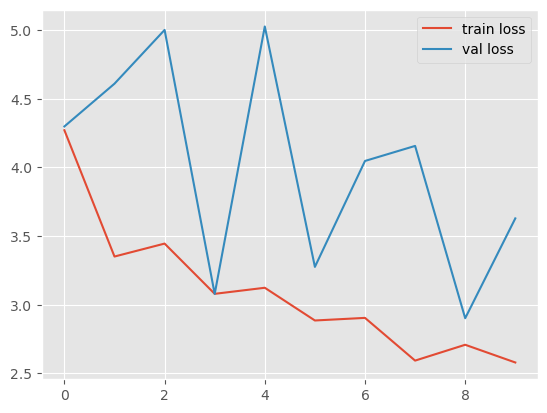

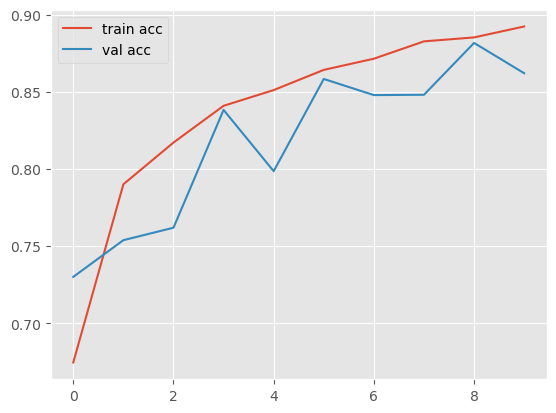

<Figure size 640x480 with 0 Axes>

In [14]:
plt.style.use("ggplot")

# plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [16]:
#predicting
y_pred = model.predict(test_generator)
y_pred

287/287 [==============================] - 151s 523ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.3489781e-32, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.2101617e-13, 9.8275721e-01, 2.5265352e-27, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [17]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([6, 7, 4, ..., 1, 9, 9])

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



In [20]:
model=load_model('model_inception.h5')

In [25]:
from tensorflow.keras.utils import img_to_array
test_img = load_img("leaf.JPG", target_size = (224,224))
test_img= img_to_array(test_img)
test_img.shape

(224, 224, 3)

In [26]:
test_img = np.expand_dims(test_img, axis=0)
test_img.shape

(1, 224, 224, 3)

In [29]:
test_img = preprocess_input(test_img)
result = model.predict(test_img)
result

1/1 [==============================] - 0s 45ms/step


array([[9.4852776e-37, 1.2248930e-09, 1.0000000e+00, 6.4821753e-16,
        9.7975014e-15, 2.4651176e-25, 5.2365815e-25, 9.5974842e-38,
        1.7357720e-12, 7.7154736e-23]], dtype=float32)

In [33]:
ans = np.argmax(result, axis = 1) 
ans

array([2])

In [43]:
# imported necessary libraries
# import gradio as gr

 
# # # Download human-readable labels.
# # response = requests.get("https://git.io/JJkYN")
# # labels = response.text.split("\n")
 
# def classify_image(image):
#     """ Returns a dictionary with key as label and values 
#     as the predicted confidence for that label"""
#     # reshaping the image 
#     test_img= img_to_array(test_img)
#     test_img = np.expand_dims(test_img, axis=0)
    
#     # preprocessing the image for inception_v3

#     test_img = preprocess_input(test_img)
    
    
#     # predicting the output
#     prediction = model.predict(image).flatten()
#     return {labels[i]: float(prediction[i]) for i in range(1000)}
 
# # initializing the input component
# image = gr.inputs.Image(shape = (244, 244, 3)) 
# # initializing the output component 
# label = gr.outputs.Label(num_top_classes = 10) 
 
# # launching the interface
# gr.Interface(fn = classify_image, inputs = image, 
#              outputs = label, capture_session = True).launch()